# Student Performance EDA and FE

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## checking null values

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

## checking duplicates

In [29]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

## categories of all columns

In [6]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [7]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [8]:
df['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [9]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [10]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

## dataframe description

In [11]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## dataframe information

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## making new columns for total score and average

In [13]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## categorical and numerical features

In [16]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f'categorical features {cat_features}')
print(f'numerical features {num_features}')

categorical features ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numerical features ['math score', 'reading score', 'writing score', 'total_score', 'average']


In [28]:
topper = len(df[df['total_score'] == 300]['average'])
print(f'number of topper students {topper}')
failed_std = len(df[df['total_score'] < 99])
print(f'number of failure students {failed_std}')

number of topper students 3
number of failure students 15


## histogram & kde

### average score of students

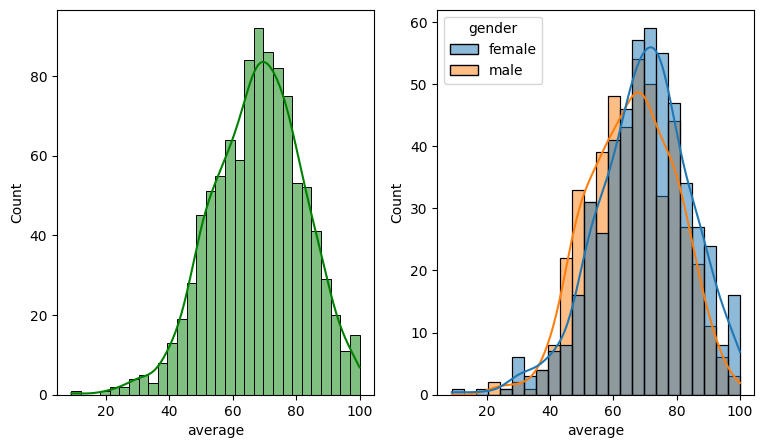

In [37]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x=df['average'],bins=30,kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df,x=df['average'],kde=True,hue=df['gender'])
plt.show()

#### insights : female students has scored higher than male

### total score by gender of students

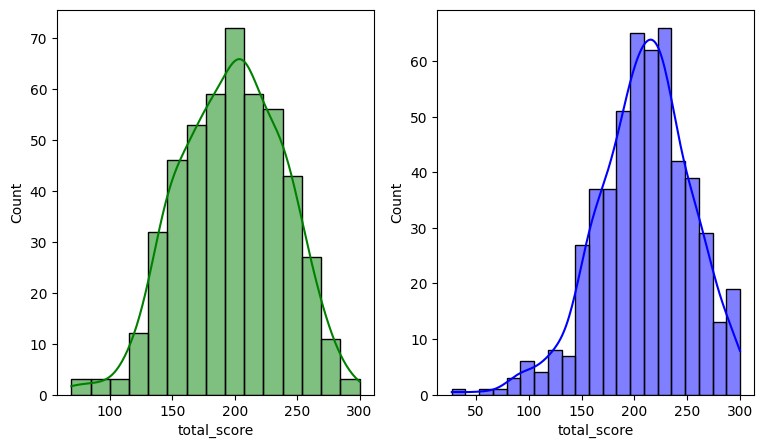

In [44]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
sns.histplot(data=df[df['gender'] == 'male'],x='total_score',kde=True,color='g')
plt.subplot(1,2,2)
sns.histplot(data=df[df['gender'] == 'female'],x='total_score',kde=True,color='b')
plt.show()

### parents education level

In [ ]:
parent_edu_level = df['parental level of education'].value_counts()
px.pie(labels=parent_edu_level.index,values=parent_edu_level.values,title='Parent Education Level',names=parent_edu_level.index)

### number of standard and free lunch students

In [58]:
px.bar(x=df['lunch'].value_counts().index,y=df['lunch'].value_counts().values)